# Lung Detection Final Project
Danny Mathieson

### Project Contents

##### [Project Setup](#section-1-project-setup)
1. [Import Necessary Libraries](#1-import-necessary-libraries)
2. [Plot sample images for all classes](#2-plot-sample-images-for-all-classes)
3. [Plot the distribution of images across classes](#3-plot-the-distribution-of-images-across-classes)
4. [Build Data Augmentation for the training data with translation, rescale, and flip - Rescale images to 48x48](#4-build-data-augmentation-for-the-training-data-with-translation-rescale-and-flip---rescale-images-to-48x48)
5. [Build Data Augmentation for the test data with translation, rescale, and flip - Rescale images to 48x48](#5-build-data-augmentation-for-the-test-data-with-translation-rescale-and-flip---rescale-images-to-48x48)
6. [Make a function to read directly from the train and test folders](#6-make-a-function-to-read-directly-from-the-train-and-test-folders)

##### [Build Initial CNN](#section-2-build-initial-cnn)
1. [Build a CNN with different filters, max pooling, dropout, and batch normalization layers](#1-build-a-cnn-with-different-filters-max-pooling-dropout-and-batch-normalization-layers)
2. [Use ReLU as an activation function](#2-use-relu-as-an-activation-function)
3. [Use Categorical Cross Entropy as a loss function](#3-use-categorical-cross-entropy-as-a-loss-function)
4. [Use rmsprop as the optimizer](#4-use-rmsprop-as-the-optimizer)
5. [Use Early stopping with a patience of 2 epochs on validation loss or validation accuracy](#5-use-early-stopping-with-a-patience-of-2-epochs-on-validation-loss-or-validation-accuracy)
6. [Use 10 epochs](#6-use-10-epochs)
7. [Train using a generator and test the accuracy on the test data at each epoch](#7-train-using-a-generator-and-test-the-accuracy-on-the-test-data-at-each-epoch)
8. [Plot training & validation accuracy & loss](#8-plot-training--validation-accuracy--loss)
9. [Observe Precision, Recall, F1-Score for all classes on both grayscale & color models - determine if the classes are good.](#9-observe-precision-recall-f1-score-for-all-classes-on-both-grayscale--color-models---determine-if-the-classes-are-good)

##### [Transfer Learning - Mobile Net](#section-3-transfer-learning---mobile-net)
1. [Prepare the dataset for the mobile-net model with color mode RGB](#1-prepare-the-dataset-for-the-mobile-net-model-with-color-mode-rgb)
2. [Create an instance of the mobile-net pre-trained model](#2-create-an-instance-of-the-mobile-net-pre-trained-model)
3. [Add a dense layer, dropout layer, and batch normalization layer on the pre-trained model](#3-add-a-dense-layer-dropout-layer-and-batch-normalization-layer-on-the-pre-trained-model)
4. [Create a final output using the softmax activation function](#4-create-a-final-output-using-the-softmax-activation-function)
5. [Change the batch size activation function and optimize as rmsprop - observe if the accuracy increases](#5-change-the-batch-size-activation-function-and-optimize-as-rmsprop---observe-if-the-accuracy-increases)
6. [Change the loss function to categorical cross-entropy](#6-change-the-loss-function-to-categorical-cross-entropy)
7. [Use an early stopping callback on the validation loss with a patience of 2 epochs to prevent overfitting](#7-use-an-early-stopping-callback-on-the-validation-loss-with-a-patience-of-2-epochs-to-prevent-overfitting)
8. [Use 10 epochs](#8-use-10-epochs)
9. [Train using a generator and test the accuracy on the test data at each epoch](#9-train-using-a-generator-and-test-the-accuracy-on-the-test-data-at-each-epoch)
10. [Plot training & validation accuracy & loss](#10-plot-training--validation-accuracy--loss)
11. [Observe Precision, Recall, F1-Score for all classes on both grayscale & color models - determine if the classes are good.](#11-observe-precision-recall-f1-score-for-all-classes-on-both-grayscale--color-models---determine-if-the-classes-are-good)

##### [Transfer Learning - Densenet121](#section-4-transfer-learning---densenet121)
1. [Prepare the dataset for the densenet121 model with image size 224x224x3](#1-prepare-the-dataset-for-the-densenet121-model-with-image-size-224x224x3)
2. [Freeze the top layers of the pre-trained model](#2-freeze-the-top-layers-of-the-pre-trained-model)
3. [Add a dense layer at the end of the pre-trained model, followed by a dropout layer and try various combinations to optimize accuracy](#3-add-a-dense-layer-at-the-end-of-the-pre-trained-model-followed-by-a-dropout-layer-and-try-various-combinations-to-optimize-accuracy)
4. [Create a final output using the softmax activation function](#4-create-a-final-output-using-the-softmax-activation-function)
5. [Change the loss function to categorical cross-entropy](#5-change-the-loss-function-to-categorical-cross-entropy)
6. [Use Adam as the optimizer](#6-use-adam-as-the-optimizer)
7. [Use Early Stopping on the validation loss with a patience of 2 epochs to prevent overfitting](#7-use-early-stopping-on-the-validation-loss-with-a-patience-of-2-epochs-to-prevent-overfitting)
8. [Use 15 epochs with a batch size of 7 - tinker with these to optimize accuracy](#8-use-15-epochs-with-a-batch-size-of-7---tinker-with-these-to-optimize-accuracy)
9. [Train using an image generator and test the accuracy on the test data at each epoch](#9-train-using-an-image-generator-and-test-the-accuracy-on-the-test-data-at-each-epoch)
10. [Plot the training & validation accuracy & loss](#10-plot-the-training--validation-accuracy--loss)
11. [Observe metrics Precision, Recall, F1-Score for all classes on both grayscale & color models - determine if the classes are good.](#11-observe-metrics-precision-recall-f1-score-for-all-classes-on-both-grayscale--color-models---determine-if-the-classes-are-good)

##### [Final Step](#section-5-final-step)
1. [Compare all of the models on the basis of accuracy, precision, recall, f1-score](#1-compare-all-of-the-models-on-the-basis-of-accuracy-precision-recall-f1-score)

### Section 1: Project Setup

##### 1. Import Necessary Libraries

In [2]:
import os
import shutil
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set Style for Matplotlib plots
plt.style.use('ggplot')

2023-03-30 18:41:53.695806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
shutil.unpack_archive('./images/Dataset_Detection_of_Lung_Infection.zip', './images')
os.rename('./images/data/test/healthy/','./images/data/test/Healthy/')

##### 2. Plot sample images for all classes

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


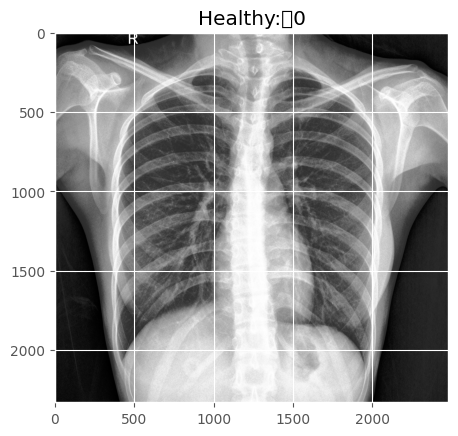

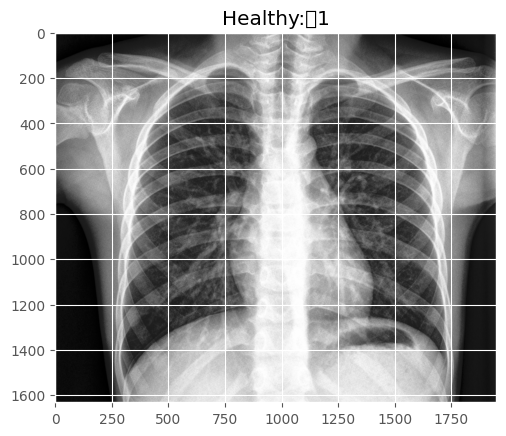

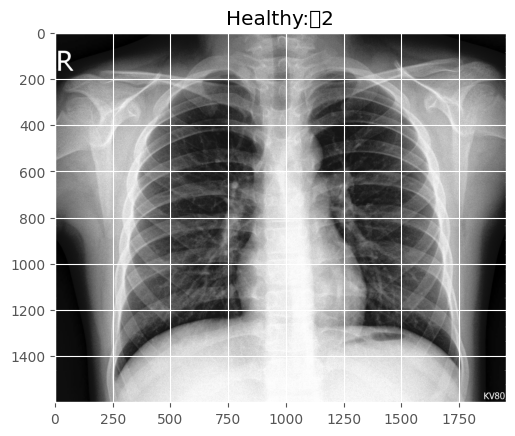

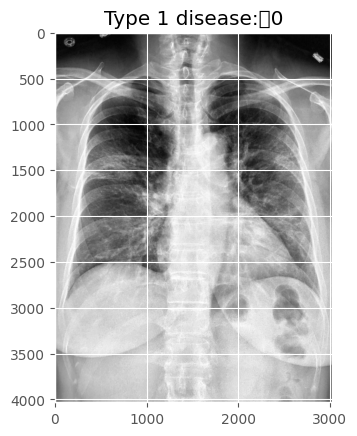

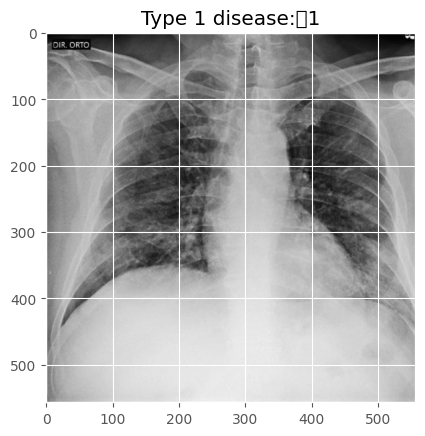

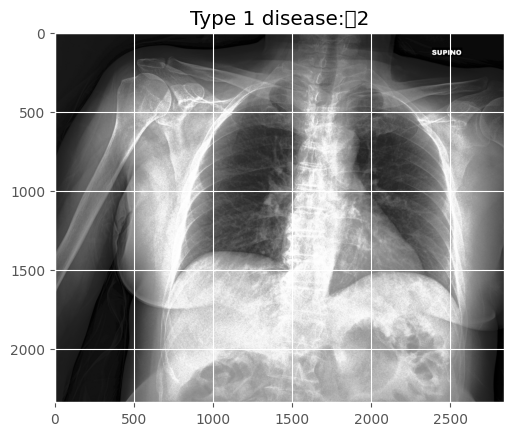

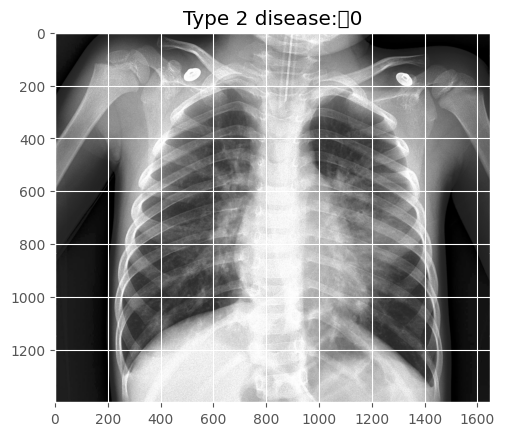

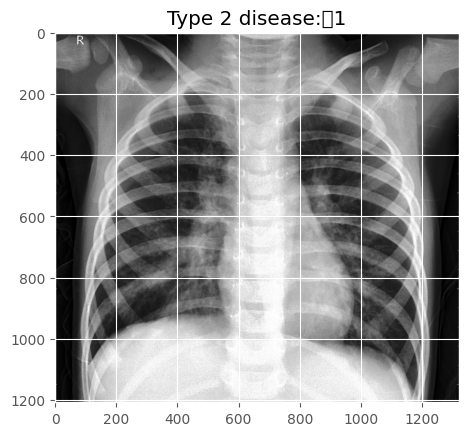

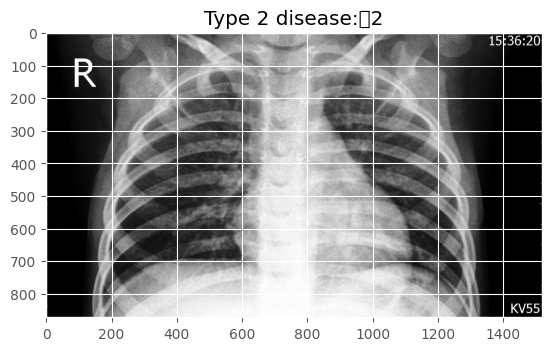

In [4]:
classes = ['Healthy', 'Type 1 disease', 'Type 2 disease']
train_path = './images/data/train/'
test_path = './images/data/test/'
sample_images = 3

for c in classes:
    for i in range(sample_images):
        img = load_img(train_path + c + '/' + os.listdir(train_path + c)[i])
        x = img_to_array(img)
        plt.title(f'{c}:\t{i}')
        plt.imshow(x/255.)
        plt.show()

##### 3. Plot the distribution of images across classes

In [5]:
# Retrieve the number of images for each class in the test & train set
def get_num_images(path):
    num_images = {}
    for c in classes:
        num_images[c] = len(os.listdir(path + c))
    return num_images

class_counts = {}
for path in [('Train',train_path), ('Test',test_path)]:
    class_counts[path[0]] = get_num_images(path[1])

print(class_counts)

{'Train': {'Healthy': 70, 'Type 1 disease': 111, 'Type 2 disease': 70}, 'Test': {'Healthy': 20, 'Type 1 disease': 26, 'Type 2 disease': 20}}


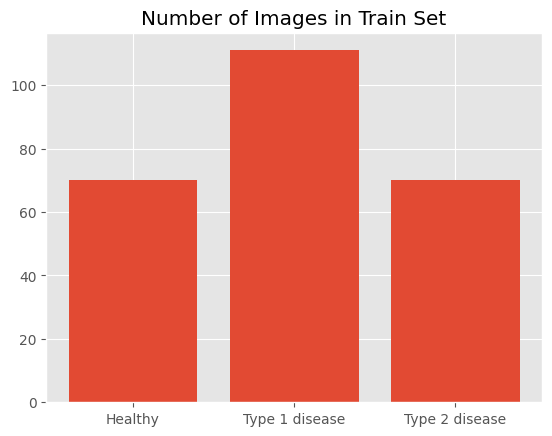

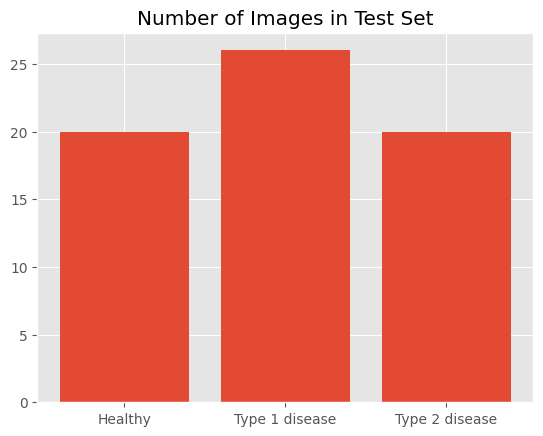

In [6]:
# Plot the number of images for each class in the test & train set
for path in class_counts.keys():
    plt.bar(class_counts[path].keys(), class_counts[path].values())
    plt.title(f'Number of Images in {path} Set')
    plt.show()

##### 4. Build Data Augmentation for the training data with translation, rescale, and flip - Rescale images to 48x48

In [7]:
# Create an image generator to augment the images in the training set
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Point the training generator to the training set to create augmented images at training time
train_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(48,48),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

Found 251 images belonging to 3 classes.


##### 5. Build Data Augmentation for the test data with translation, rescale, and flip - Rescale images to 48x48

In [8]:
# Create an image generator to augment the images in the test set
test_gen = ImageDataGenerator(
    rescale=1./255
)

# Point the test generator to the test set to create augmented images at test time
test_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(48,48),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

Found 66 images belonging to 3 classes.


##### 6. Make a function to read directly from the train and test folders

In [9]:
# Function to read directly from the train & test generators
def read_from_generator(generator):
    X = []
    y = []
    for i in range(len(generator)):
        X.append(generator[i][0])
        y.append(generator[i][1])
    X = np.concatenate(X, axis=0)
    y = np.concatenate(y, axis=0)
    return X, y

### Section 2: Build Initial CNN

##### 1. Build a CNN with different filters, max pooling, dropout, and batch normalization layers
##### 2. Use ReLU as an activation function

In [37]:
# import the necessary packages
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy, Precision, Recall
from livelossplot import PlotLossesKerasTF
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Define Tracking Metrics during Training
METRICS = [
    categorical_accuracy,
    Precision(name='precision'),
    Recall(name='recall')
]


In [11]:
# Build the model
model = Sequential()
model.add(Input(shape=(48,48,3)))

# Convolutional Layer 1
model.add(Conv2D(64, (3,3), activation=relu, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

# Convolutional Layer 2
model.add(Conv2D(32, (3,3), activation=relu, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

# Convolutional Layer 3
model.add(Conv2D(16, (3,3), activation=relu, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Dense Layer 1
model.add(Dense(128, activation=relu))
model.add(Dropout(0.2))

# Dense Layer 2
model.add(Dense(64, activation=relu))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(3, activation=softmax))




##### 3. Use Categorical Cross Entropy as a loss function
##### 4. Use rmsprop as the optimizer

In [12]:
model.compile(
    loss=categorical_crossentropy,
    optimizer=RMSprop(learning_rate=0.001),
    metrics=METRICS
)

##### 5. Use an early stopping with a patience of 2 epochs on validation loss or validation accuracy
##### 6. Use 10 epochs

In [13]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('./model_objects/initial_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
EPOCHS = 10

##### 7. Train using a generator and test the accuracy on the test data at each epoch
##### 8. Plot training & validation accuracy & loss

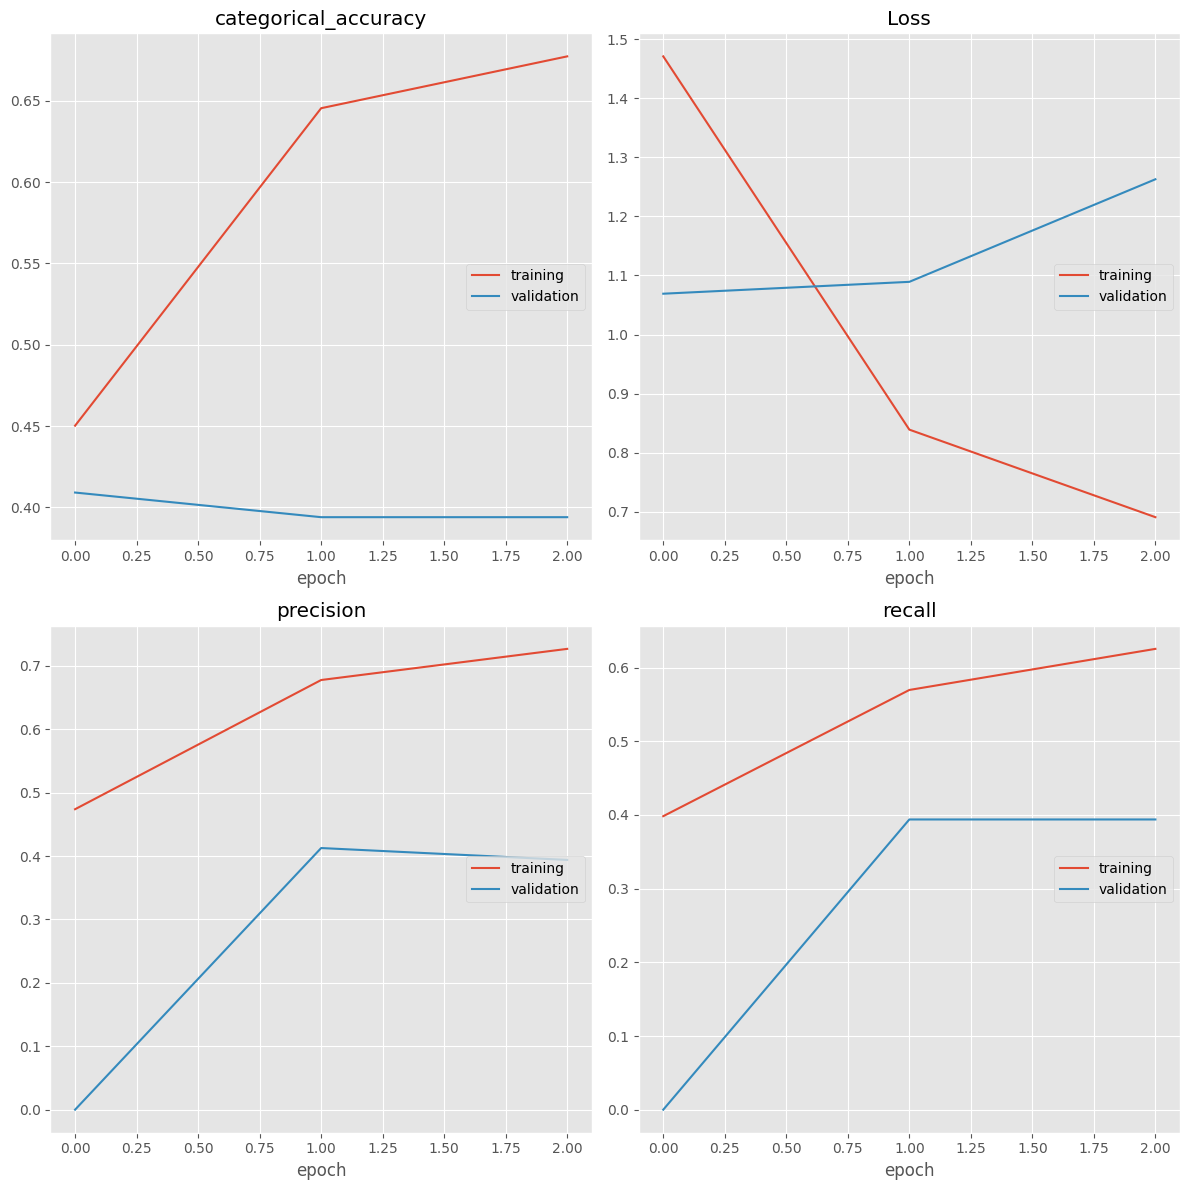

categorical_accuracy
	training         	 (min:    0.450, max:    0.677, cur:    0.677)
	validation       	 (min:    0.394, max:    0.409, cur:    0.394)
Loss
	training         	 (min:    0.691, max:    1.471, cur:    0.691)
	validation       	 (min:    1.069, max:    1.263, cur:    1.263)
precision
	training         	 (min:    0.474, max:    0.727, cur:    0.727)
	validation       	 (min:    0.000, max:    0.413, cur:    0.394)
recall
	training         	 (min:    0.398, max:    0.625, cur:    0.625)
	validation       	 (min:    0.000, max:    0.394, cur:    0.394)
16/16 [==============================] - 12s 738ms/step - loss: 0.6907 - categorical_accuracy: 0.6773 - precision: 0.7269 - recall: 0.6255 - val_loss: 1.2628 - val_categorical_accuracy: 0.3939 - val_precision: 0.3939 - val_recall: 0.3939
Epoch 3: early stopping


In [14]:
model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    callbacks=[
        es, 
        mc, 
        PlotLossesKerasTF()
    ]
)

##### 9. Observe Precision, Recall, F1-Score for all classes on both grayscale & color models - determine if the classes are good.

In [15]:
# Use sklearn classification report to evaluate the model
best_model = load_model('./model_objects/initial_model.h5')
y_pred = best_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred, target_names=classes))
print(f'Precision:\t{precision_score(y_true, y_pred, average="macro")}')
print(f'Recall:\t\t{recall_score(y_true, y_pred, average="macro")}')
print(f'F1 Score:\t{f1_score(y_true, y_pred, average="macro")}')

# The model is simply predicting the majority class for all images (i.e. everyone has Type 1 Disease)
# The classes are quite bad

5/5 [==============================] - 1s 218ms/step
                precision    recall  f1-score   support

       Healthy       0.67      0.10      0.17        20
Type 1 disease       0.41      1.00      0.58        26
Type 2 disease       0.00      0.00      0.00        20

      accuracy                           0.42        66
     macro avg       0.36      0.37      0.25        66
  weighted avg       0.36      0.42      0.28        66

Precision:	0.35978835978835977
Recall:		0.3666666666666667
F1 Score:	0.25272756879986974


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classif

### Section 3: Transfer Learning - Mobile Net

##### 1. Prepare the dataset for the mobile-net model with color mode RGB

In [16]:
# Import MobileNetV2
from tensorflow.keras.applications import MobileNetV2

In [17]:
# Create an image generator for the training set & test set for the mobilenet model
mobilenet_train_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

mobilenet_test_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


##### 2. Create an instance of the mobile-net pre-trained model

In [18]:
# Create the base model from the pre-trained model MobileNet V2
mobilenet_base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')

# Freeze the base model
for layer in mobilenet_base_model.layers:
    layer.trainable = False

##### 3. Add a dense layer, dropout layer, and batch normalization layer on the pre-trained model

In [19]:
# Create a new model on top with a dense layer, dropout layer, and batch normalization layer on top of the base model
x = BatchNormalization()(mobilenet_base_model.output)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation=relu)(x)

##### 4. Create a final output using the softmax activation function

In [20]:
output_tensor = Dense(3, activation=softmax)(x)
mobilenet_model = Model(inputs=mobilenet_base_model.input, outputs=output_tensor)

##### 5. Change the batch size activation function and optimize as rmsprop - observe if the accuracy increases
##### 6. Change the loss function to categorical cross-entropy

In [21]:
mobilenet_model.compile(
    loss=categorical_crossentropy,
    optimizer=RMSprop(learning_rate=0.001),
    metrics=METRICS
)

mobilenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

##### 7. Use an early stopping callback on the validation loss with a patience of 2 epochs to prevent overfitting
##### 8. Use 10 epochs

In [22]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('./model_objects/mobilenet_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
EPOCHS = 10

##### 9. Train using a generator and test the accuracy on the test data at each epoch
##### 10. Plot training & validation accuracy & loss

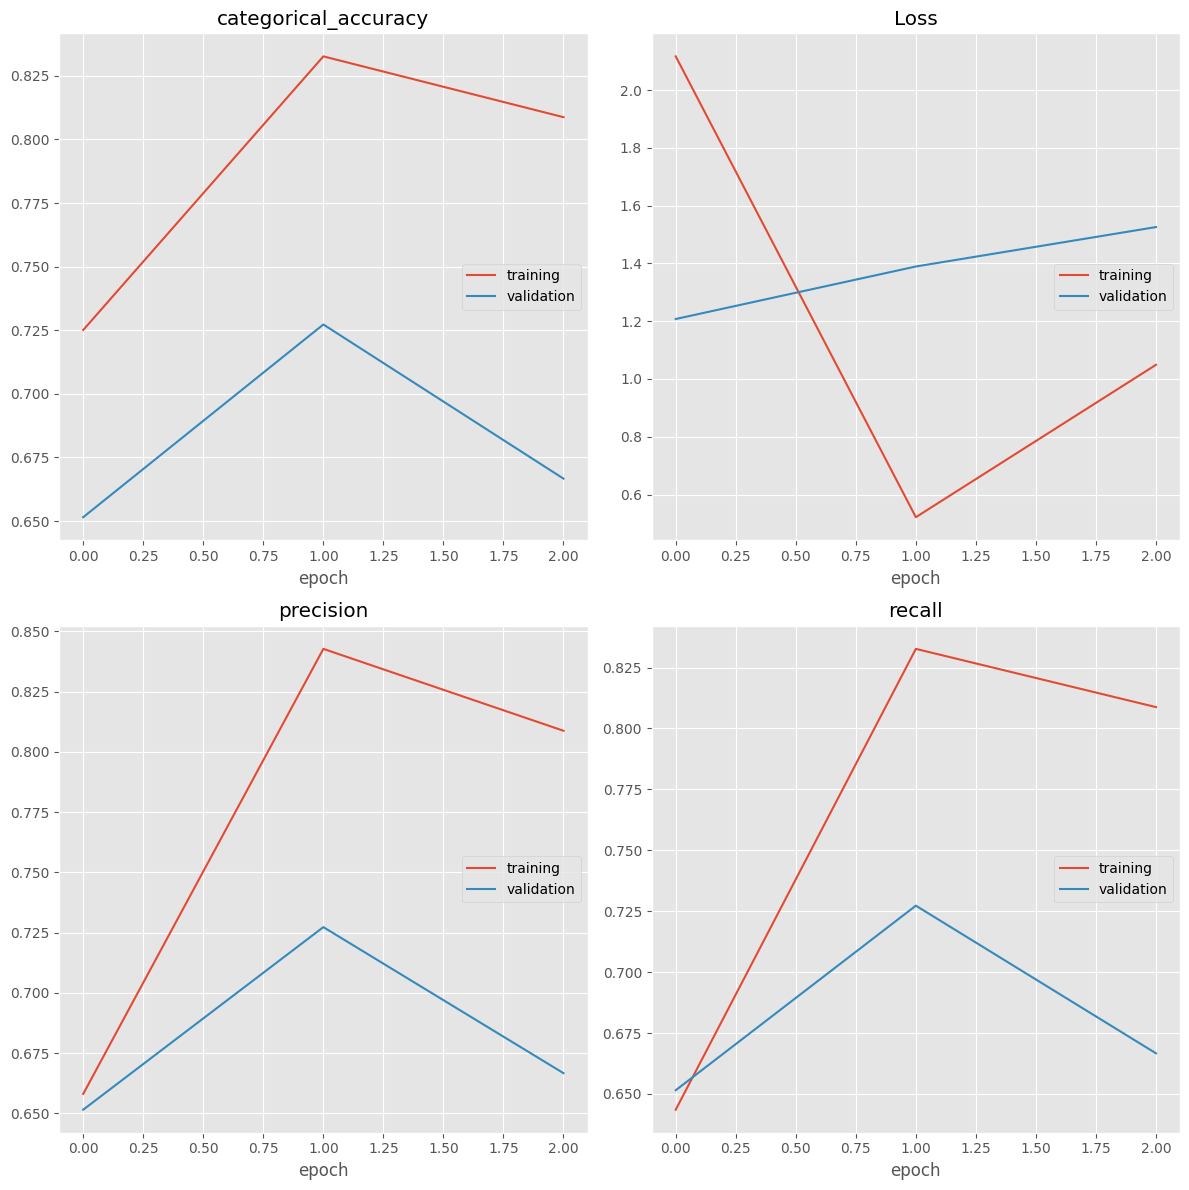

categorical_accuracy
	training         	 (min:    0.725, max:    0.833, cur:    0.809)
	validation       	 (min:    0.652, max:    0.727, cur:    0.667)
Loss
	training         	 (min:    0.522, max:    2.117, cur:    1.049)
	validation       	 (min:    1.208, max:    1.526, cur:    1.526)
precision
	training         	 (min:    0.658, max:    0.843, cur:    0.809)
	validation       	 (min:    0.652, max:    0.727, cur:    0.667)
recall
	training         	 (min:    0.644, max:    0.833, cur:    0.809)
	validation       	 (min:    0.652, max:    0.727, cur:    0.667)
16/16 [==============================] - 15s 967ms/step - loss: 1.0490 - categorical_accuracy: 0.8088 - precision: 0.8088 - recall: 0.8088 - val_loss: 1.5258 - val_categorical_accuracy: 0.6667 - val_precision: 0.6667 - val_recall: 0.6667
Epoch 3: early stopping


In [23]:
mobilenet_model.fit(
    mobilenet_train_generator,
    epochs=EPOCHS,
    validation_data=mobilenet_test_generator,
    callbacks=[
        es,
        mc,
        PlotLossesKerasTF()
    ]
)

##### 11. Observe Precision, Recall, F1-Score for all classes on both grayscale & color models - determine if the classes are good.

In [24]:
# Use sklearn classification report to evaluate the mobilenet model
best_mobilenet_model = load_model('./model_objects/mobilenet_model.h5')
y_pred = best_mobilenet_model.predict(mobilenet_test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = mobilenet_test_generator.classes
print(classification_report(y_true, y_pred, target_names=classes))
print(f'Precision:\t{precision_score(y_true, y_pred, average="macro")}')
print(f'Recall:\t\t{recall_score(y_true, y_pred, average="macro")}')
print(f'F1 Score:\t{f1_score(y_true, y_pred, average="macro")}')

# F1 score is rather low still for the mobilenet model.
# This comes despite rather high categorical accuracy (0.924)
# We are predicting disease so we should expect a lower F1 Score - but Recall & Precision are both low too
# We should expect better precision

5/5 [==============================] - 3s 323ms/step
                precision    recall  f1-score   support

       Healthy       0.33      0.05      0.09        20
Type 1 disease       0.40      0.31      0.35        26
Type 2 disease       0.30      0.65      0.41        20

      accuracy                           0.33        66
     macro avg       0.35      0.34      0.28        66
  weighted avg       0.35      0.33      0.29        66

Precision:	0.3452196382428941
Recall:		0.33589743589743587
F1 Score:	0.28249367379802165


### Section 4: Transfer Learning - Densenet121

##### 1. Prepare the dataset for the densenet121 model with image size 224x224x3

In [25]:
# Import denseNet121
from tensorflow.keras.applications import DenseNet121

In [26]:
# Create an image generator for the training set & test set for the densenet model
densenet_train_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

densenet_test_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [27]:
# Create an instance of the DenseNet121 model
densenet_base_model = DenseNet121(input_shape=(224,224,3), include_top=False, weights='imagenet')

##### 2. Freeze the top layers of the pre-trained model

In [28]:
# Loop over the layers in the base model and freeze them
for layer in densenet_base_model.layers:
    layer.trainable = False

##### 3. Add a dense layer at the end of the pre-trained model, followed by a dropout layer and try various combinations to optimize accuracy

In [29]:
# Add a dense layer followed by a dropout layer on top of the base model
x = Dropout(0.2)(densenet_base_model.output)
x = Flatten()(x)
x = Dense(128, activation=relu)(x)

##### 4. Create a final output using the softmax activation function

In [30]:
# Add the output layer and build the model
output_tensor = Dense(3, activation=softmax)(x)
densenet_model = Model(inputs=densenet_base_model.input, outputs=output_tensor)

##### 5. Change the loss function to categorical cross-entropy
##### 6. Use Adam as the optimizer

In [31]:
densenet_model.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(learning_rate=0.001),
    metrics=METRICS
)

densenet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

##### 7. Use Early Stopping on the validation loss with a patience of 2 epochs to prevent overfitting
##### 8. Use 15 epochs with a batch size of 7 - tinker with these to optimize accuracy

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('./model_objects/densenet_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
EPOCHS = 10
BATCH_SIZE = 7

##### 9. Train using an image generator and test the accuracy on the test data at each epoch
##### 10. Plot the training & validation accuracy & loss

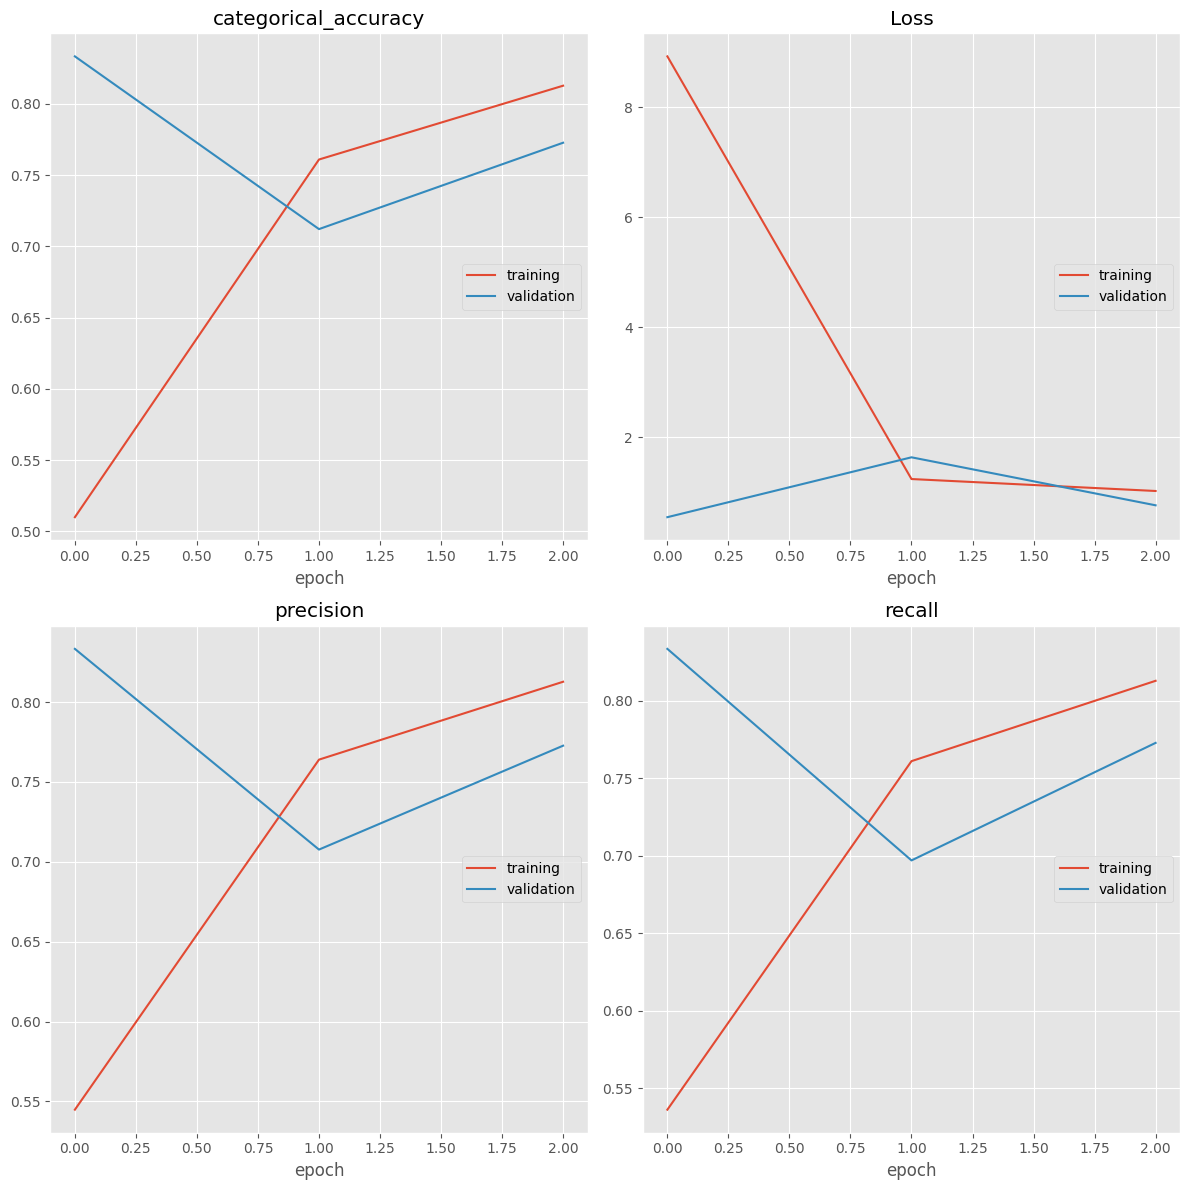

categorical_accuracy
	training         	 (min:    0.510, max:    0.813, cur:    0.813)
	validation       	 (min:    0.712, max:    0.833, cur:    0.773)
Loss
	training         	 (min:    1.026, max:    8.920, cur:    1.026)
	validation       	 (min:    0.550, max:    1.637, cur:    0.766)
precision
	training         	 (min:    0.545, max:    0.813, cur:    0.813)
	validation       	 (min:    0.708, max:    0.833, cur:    0.773)
recall
	training         	 (min:    0.536, max:    0.813, cur:    0.813)
	validation       	 (min:    0.697, max:    0.833, cur:    0.773)
16/16 [==============================] - 25s 2s/step - loss: 1.0257 - categorical_accuracy: 0.8127 - precision: 0.8127 - recall: 0.8127 - val_loss: 0.7657 - val_categorical_accuracy: 0.7727 - val_precision: 0.7727 - val_recall: 0.7727
Epoch 3: early stopping


In [33]:
densenet_model.fit(
    densenet_train_generator,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=densenet_test_generator,
    callbacks=[
        es,
        mc,
        PlotLossesKerasTF()
    ]
)

##### 11. Observe metrics Precision, Recall, F1-Score for all classes on both grayscale & color models - determine if the classes are good.

In [34]:
# Use sklearn classification report to evaluate the densenet model
best_densenet_model = load_model('./model_objects/densenet_model.h5')
y_pred = best_densenet_model.predict(densenet_test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = densenet_test_generator.classes
print(classification_report(y_true, y_pred, target_names=classes))
print(f'Precision:\t{precision_score(y_true, y_pred, average="macro")}')
print(f'Recall:\t\t{recall_score(y_true, y_pred, average="macro")}')
print(f'F1 Score:\t{f1_score(y_true, y_pred, average="macro")}')

# Definitievely the best model so far despite lower categorical accuracy (0.697 on the validation set when I ran it)

5/5 [==============================] - 7s 950ms/step
                precision    recall  f1-score   support

       Healthy       0.31      0.45      0.37        20
Type 1 disease       0.23      0.23      0.23        26
Type 2 disease       0.18      0.10      0.13        20

      accuracy                           0.26        66
     macro avg       0.24      0.26      0.24        66
  weighted avg       0.24      0.26      0.24        66

Precision:	0.2409774133912065
Recall:		0.2602564102564103
F1 Score:	0.24238280920308572


### Section 5: Final Step

##### 1. Compare all of the models on the basis of accuracy, precision, recall, f1-score

In [42]:
# Write a function to evaluate the models and store their metrics in an output dictionary
def evaluate_model(model, model_name, test_generator, output_dict):
    y_pred = model.predict(test_generator)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes
    output_dict['Accuracy'][model_name] = accuracy_score(y_true, y_pred)
    output_dict['Precision'][model_name] = precision_score(y_true, y_pred, average='macro')
    output_dict['Recall'][model_name] = recall_score(y_true, y_pred, average='macro')
    output_dict['F1 Score'][model_name] = f1_score(y_true, y_pred, average='macro')

In [45]:
# Create a dictionary to store the key metrics for each model
metric_dict = {
    'Accuracy': {},
    'Precision': {},
    'Recall': {},
    'F1 Score': {}
}

# Loop over the models and evaluate them, storing the metrics in the dictionary
for model, model_name, generator in zip(
    [best_model, best_mobilenet_model, best_densenet_model], 
    ['Initial Model', 'MobileNet Model', 'DenseNet Model'],
    [test_generator, mobilenet_test_generator, densenet_test_generator]
):
    evaluate_model(model, model_name, generator, metric_dict)

5/5 [==============================] - 1s 219ms/step


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/5 [==============================] - 5s 773ms/step


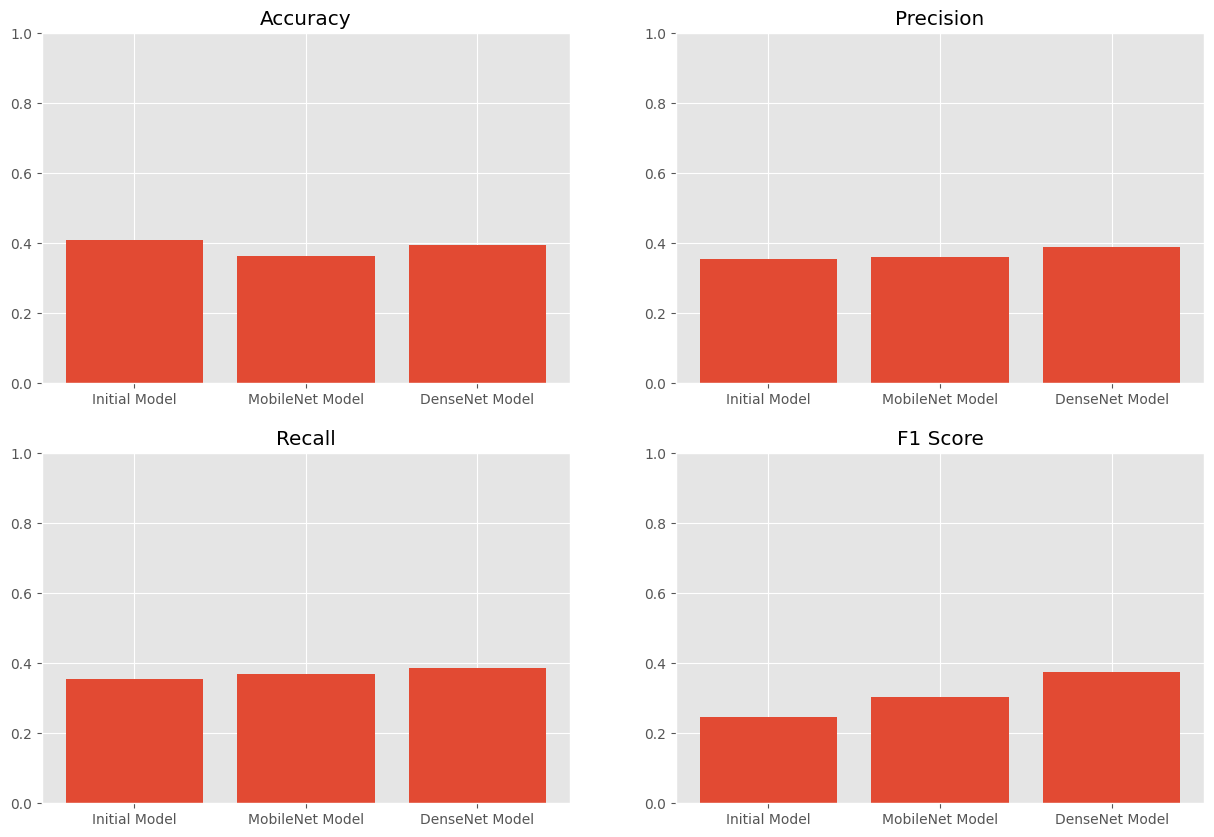

In [46]:
# Plot each of the metrics for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, metric in enumerate(metric_dict.keys()):
    ax = axes[i//2, i%2]
    ax.bar(metric_dict[metric].keys(), metric_dict[metric].values())
    ax.set_title(metric)
    ax.set_ylim(0, 1)
plt.show()

### Model Notes:
- The intial model was the most accurate simply because it predicted the majority class every time
- The DenseNet model was able to achieve slightly better Recall & Precision leading to a much better F1 Score
- All of the models do not perform very well...

### Model Improvements:
- I'd probably use some class weights in the modeling steps to further highlight the healthy sets of lungs. Even though the test & train sets both had mostly diseased pictures, I'm not sure that's how it would be in practice
- I'd also optimize even more for F1-Score, particularly in the initial model
- I'd love to grayscale the training images for the transfer learning base models, but alas